<a href="https://colab.research.google.com/github/cyrustabatab/LaneDetectionOnVideo/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch, torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms


In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./images', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./images', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 26619268.37it/s]                            


Extracting ./images/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 443394.37it/s]
  1%|          | 16384/1648877 [00:00<00:11, 144493.71it/s]

Extracting ./images/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7574402.24it/s]                            
8192it [00:00, 181437.56it/s]


Extracting ./images/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./images/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
def im_covert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array([0.5,0.5,0.5]) + np.array([0.5,0.5,0.5])
  image = image.clip(0,1)
  return image
  

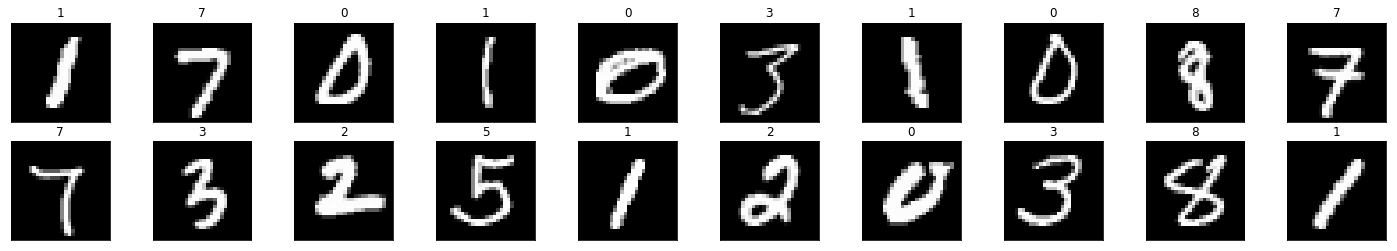

In [8]:
dataiter = iter(training_loader)

images,labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i + 1,xticks=[],yticks=[])
  plt.imshow(im_covert(images[i]))
  ax.set_title(labels[i].item())

In [0]:
class Classifier(nn.Module):
  def __init__(self,D_in,H1,H2,b_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,b_out)
  
  def forward(self,x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x
  

In [0]:
model = Classifier(784,125,65,10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [0]:
epochs = 12

losses = []
corrects_history = []
val_running_loss_history = []
val_running_loss_corrects = []

for epoch in range(epochs):
  total_loss = 0
  total_correct = 0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for images,labels in training_loader:
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _,preds = torch.max(outputs,1)
    total_correct += torch.sum(preds == labels.data)
    total_loss += loss.item()
  else:
    with torch.no_grad():
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)
        _,val_preds = torch.max(val_outputs,1)
        val_running_corrects += torch.sum(val_preds == val_labels.data)
        val_running_loss += val_loss.item()
    epoch_loss = total_loss / len(training_loader)
    epoch_accuracy = total_correct / len(training_loader)
    val_epoch_loss = val_running_loss / len(validation_loader)
    val_accuracy = val_running_corrects / len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_loss_corrects.append(val_accuracy)
    losses.append(epoch_loss)
    corrects_history.append(epoch_accuracy)
    print("epoch", epoch + 1)
    print(f"Training loss: {epoch_loss:.4f}, {epoch_accuracy:.2f}")
    print(f"Validation loss: {val_epoch_loss:.4f}, {val_accuracy:.2f}")

epoch 1
Training loss: 0.2078, 93.00
Validation loss: 0.0894, 97.00
epoch 2
Training loss: 0.0970, 97.00
Validation loss: 0.0878, 97.00


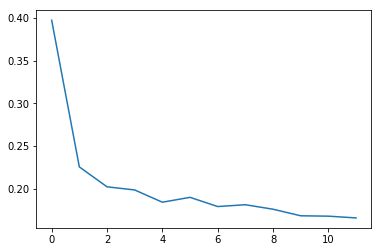

In [0]:
plt.plot(losses,label="training_loss")

In [0]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url,stream=True)

img = Image.open(response.raw)
plt.imshow(img)

AttributeError: ignored

In [0]:
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert)

In [0]:
class LeNet(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,20,5,1)
    self.conv2 = nn.Conv2d(20,50,5,1)
    self.fc1 = nn.Linear(4*4*50,500)
    self.fc2 = nn.Linear(500,10)
  
  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(-1,4*4*50)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [16]:
model = LeNet()
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)